In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_loan = pd.read_csv("loan_sanction_train.csv")

In [3]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_loan.shape

(614, 13)

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.crosstab(df_loan['Credit_History'], df_loan['Loan_Status'], margins = True)


Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [8]:
pd.crosstab(df_loan['Self_Employed'], df_loan['Education'], margins = True)

Education,Graduate,Not Graduate,All
Self_Employed,,,
No,389,111,500
Yes,65,17,82
All,454,128,582


```Based on the above table: `
Applicants that are having a Credit_History are more likely to have Loan approval```

<Axes: >

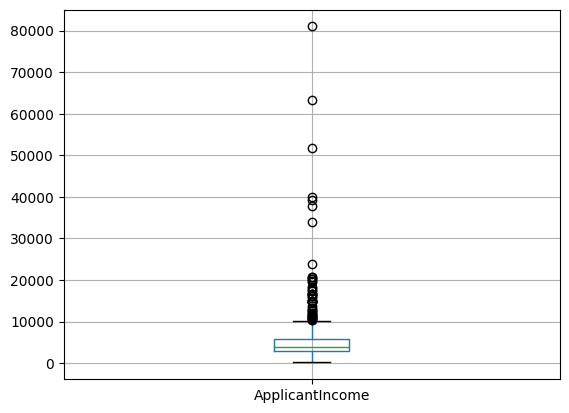

In [9]:
df_loan.boxplot(column = ['ApplicantIncome'])

<Axes: >

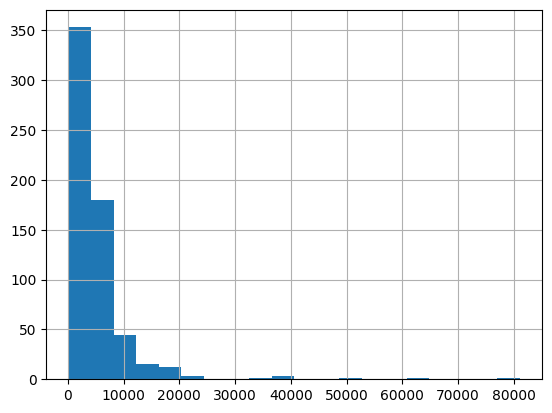

In [10]:
df_loan['ApplicantIncome'].hist(bins=20)

<Axes: >

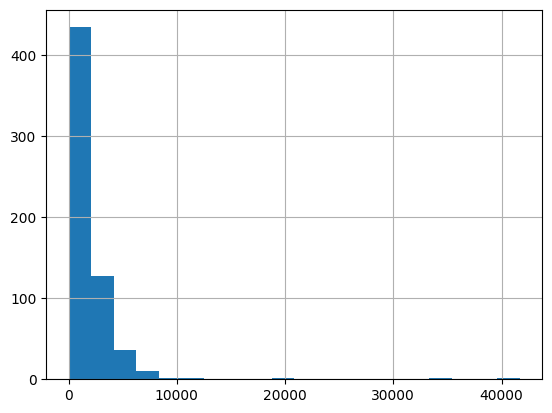

In [11]:
df_loan['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

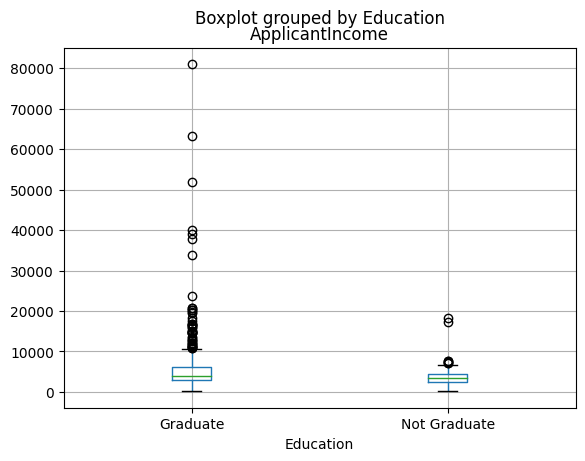

In [12]:
df_loan.boxplot(column = 'ApplicantIncome', by = 'Education')

<Axes: >

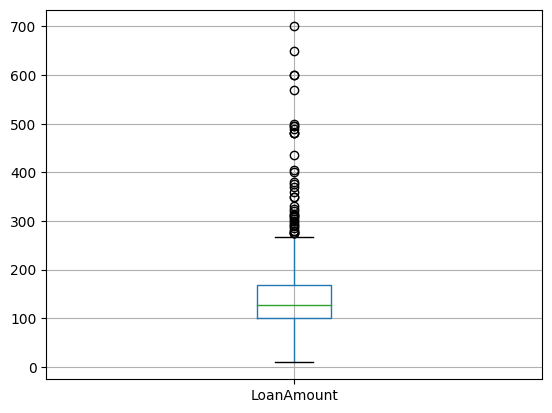

In [13]:
df_loan.boxplot(column = ['LoanAmount'])

<Axes: >

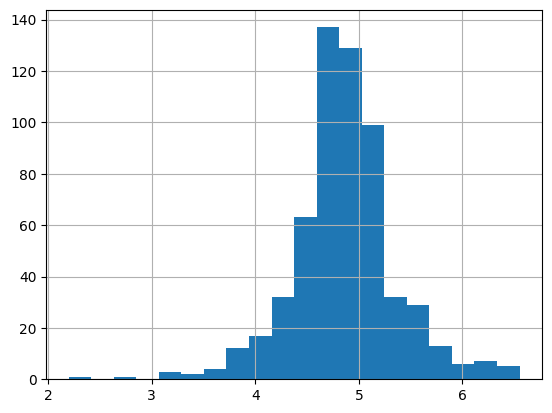

In [14]:
df_loan['LoanAmount_log'] = np.log(df_loan['LoanAmount'])
df_loan['LoanAmount_log'].hist(bins=20)

In [15]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

## Handling the missing values

In [16]:
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0], inplace = True)
df_loan['Married'].fillna(df_loan['Married'].mode()[0], inplace = True)
df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0], inplace = True)
df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0], inplace = True)
df_loan.LoanAmount = df_loan.LoanAmount.fillna(df_loan.LoanAmount.mean())
df_loan.LoanAmount_log = df_loan.LoanAmount_log.fillna(df_loan.LoanAmount_log.mean())
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0], inplace = True)
df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0], inplace = True)

In [17]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

## As our dataframe has some outliers so we will Normalize them

<Axes: >

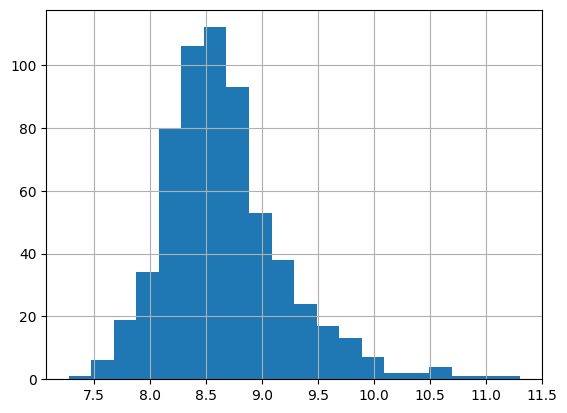

In [18]:
df_loan['TotalIncome'] = df_loan['ApplicantIncome'] + df_loan['CoapplicantIncome']
df_loan['TotalIncome_log'] = np.log(df_loan['TotalIncome'])
df_loan['TotalIncome_log'].hist(bins=20)

``As we can see that our data is much more normalize now.``

In [19]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


## Now spliting the dataset into Dependent(X) and Independent(Y) variable

In [20]:
df_loan['Loan_Status'] = df_loan['Loan_Status'].map({'N':0, 'Y':1})

In [21]:
X = df_loan.drop(['Loan_ID','Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status','TotalIncome','Property_Area'], axis = 'columns')
X

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log
0,0,360.0,1.0,4.857444,8.674026
1,1,360.0,1.0,4.852030,8.714568
2,0,360.0,1.0,4.189655,8.006368
3,0,360.0,1.0,4.787492,8.505323
4,0,360.0,1.0,4.948760,8.699515
...,...,...,...,...,...
609,0,360.0,1.0,4.262680,7.972466
610,3+,180.0,1.0,3.688879,8.320205
611,1,360.0,1.0,5.533389,9.025456
612,2,360.0,1.0,5.231109,8.933664


In [22]:
Y = df_loan['Loan_Status']
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [23]:
from imblearn.over_sampling import RandomOverSampler
res = RandomOverSampler()

Xres,Yres = res.fit_resample(X,Y)

In [24]:

X_train,X_test,Y_train,Y_test = train_test_split(Xres,Yres, test_size = 0.25, random_state = 42)

In [25]:


# Encoding the X_test dataset

X_train_encoded = X_train.copy()

# Identify categorical columns
categorical_columns = X_train_encoded.select_dtypes(include=['object']).columns

# Iterate over categorical columns and apply one-hot encoding
for column in categorical_columns:
    # Convert column values to categorical codes
    X_train_encoded[column] = LabelEncoder().fit_transform(X_train_encoded[column])

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train_encoded)

# Encoding the X_test dataset

X_test_encoded = X_test.copy()

# Identify categorical columns
categorical_column = X_test_encoded.select_dtypes(include=['object']).columns

# Iterate over categorical columns and apply one-hot encoding
for columns in categorical_column:
    # Convert column values to categorical codes
    X_test_encoded[columns] = LabelEncoder().fit_transform(X_test_encoded[columns])

# Apply one-hot encoding
X_test_encoded = pd.get_dummies(X_test_encoded)


In [26]:
X_train_encoded

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log
425,0,360.0,1.0,4.795791,8.848796
660,0,360.0,1.0,4.857444,8.819813
417,2,360.0,1.0,5.476464,9.980449
759,3,180.0,1.0,4.394449,8.166784
90,0,360.0,1.0,4.875197,8.675564
...,...,...,...,...,...
71,2,360.0,1.0,4.574711,8.229511
106,2,360.0,1.0,5.416100,9.436918
270,0,360.0,1.0,3.401197,8.082402
435,0,240.0,1.0,4.857444,9.215029


In [27]:

model1 = DecisionTreeClassifier()
model1.fit(X_train_encoded, Y_train)

print(model1.score(X_train_encoded,Y_train))
print(model1.score(X_test_encoded,Y_test))

1.0
0.8104265402843602


## Scaling of Data

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn .metrics import classification_report
scl = MinMaxScaler()

In [29]:
scl.fit(X_train_encoded)

MinMaxScaler()

In [30]:
X_train_encoded_S = scl.transform(X_train_encoded)
X_test_encoded_S = scl.transform(X_test_encoded)

In [31]:
model3 = DecisionTreeClassifier(max_depth=14)
model3.fit(X_train_encoded_S,Y_train)

print('Training: ',model3.score(X_train_encoded_S,Y_train))
print('Testing: ',model3.score(X_test_encoded_S,Y_test))

Training:  0.9115323854660348
Testing:  0.7582938388625592


In [32]:
print(classification_report(Y_test, model3.predict(X_test_encoded_S)))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       114
           1       0.69      0.87      0.77        97

    accuracy                           0.76       211
   macro avg       0.77      0.77      0.76       211
weighted avg       0.78      0.76      0.76       211



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm =confusion_matrix(Y_train,model3.predict(X_train_encoded_S))
cmt =confusion_matrix(Y_test,model3.predict(X_test_encoded_S))
print(cm)
print('-------------------')
print(cmt)

[[257  51]
 [  5 320]]
-------------------
[[76 38]
 [13 84]]


In [35]:
import seaborn as sns

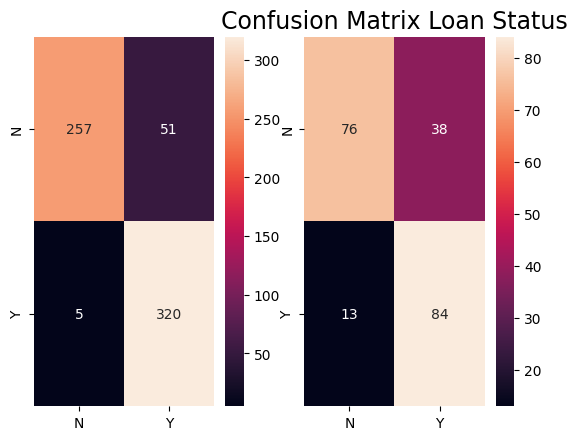

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
sns.heatmap(cm,ax=ax1,
            annot=True,
            fmt='g',
            xticklabels=['N','Y'],
            yticklabels=['N','Y'])
sns.heatmap(cmt,ax=ax2,
            annot=True,
            fmt='g',
            xticklabels=['N','Y'],
            yticklabels=['N','Y'])
plt.title('Confusion Matrix Loan Status',fontsize=17)
plt.show()

## Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators = 90)

rmodel.fit(X_train_encoded_S,Y_train)

RandomForestClassifier(n_estimators=90)

In [38]:
print('Training: ',rmodel.score(X_train_encoded_S,Y_train))
print('Testing: ',rmodel.score(X_test_encoded_S,Y_test))

Training:  1.0
Testing:  0.8246445497630331


In [39]:
cmr =confusion_matrix(Y_train,rmodel.predict(X_train_encoded_S))
cmrt =confusion_matrix(Y_test,rmodel.predict(X_test_encoded_S))
print(cmr)
print('-------------------')
print(cmrt)

[[308   0]
 [  0 325]]
-------------------
[[95 19]
 [18 79]]


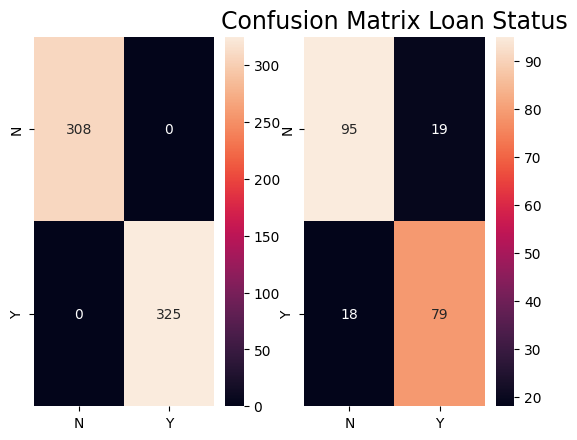

In [40]:
fig2, (ax1, ax2) = plt.subplots(1,2)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
sns.heatmap(cmr,ax=ax1,
            annot=True,
            fmt='g',
            xticklabels=['N','Y'],
            yticklabels=['N','Y'])
sns.heatmap(cmrt,ax=ax2,
            annot=True,
            fmt='g',
            xticklabels=['N','Y'],
            yticklabels=['N','Y'])
plt.title('Confusion Matrix Loan Status',fontsize=17)
plt.show()

## Testing with the loan_sanction_test.csv data